In [1]:
from deepface import DeepFace
from mtcnn import MTCNN

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import patches

In [2]:
path = "datasets/10/ukol/"
group_file = "all.jfif"
person_file = "wb.png"
# person_file = "img1.jpg"

In [3]:
group_photo = mpimg.imread(path + group_file)
person_photo = mpimg.imread(path + person_file)

# 1 Load image with multiple people

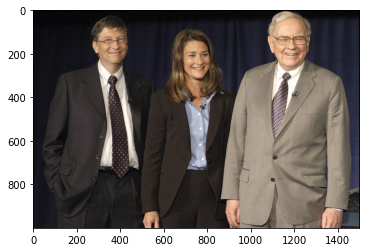

In [4]:
plt.imshow(group_photo)

# 2 Detect all faces

In [5]:
detector = MTCNN()
faces = detector.detect_faces(group_photo)
no_faces = len(faces)
print(f"MTCNN found {no_faces} faces in selected picture.")

MTCNN found 4 faces in selected picture.


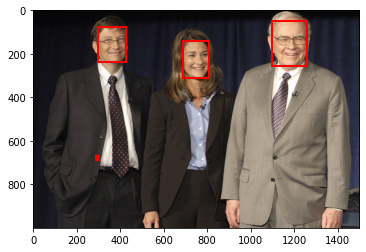

In [6]:
fig, ax = plt.subplots()

for face in faces:
    x, y, w, h = face['box']
    ax.imshow(group_photo)
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
plt.show()

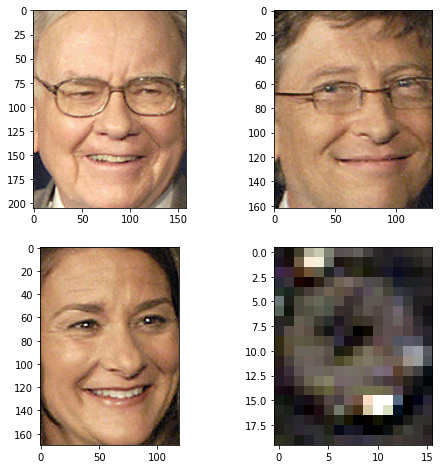

In [7]:
first_row = (no_faces // 2) + (no_faces % 2)
fig = plt.figure(figsize=(8,8))

for i, face in enumerate(faces):
    x, y, w, h = face['box']
    fig.add_subplot(no_faces - first_row, first_row, i+1)
    plt.imshow(group_photo[y:y+h, x:x+w, 0:4])

# 3 Load selected person

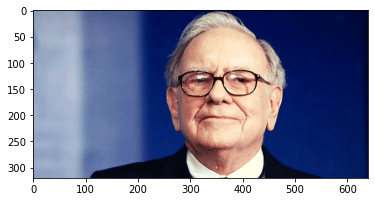

In [8]:
plt.imshow(person_photo)

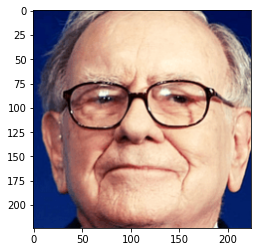

In [9]:
plt.imshow(DeepFace.detectFace(path+person_file))

# 4 Detect our person in the group photo

Our person is present in the photo, woohoo!
{'verified': True, 'distance': 0.1887646607850645, 'max_threshold_to_verify': 0.4, 'model': 'VGG-Face', 'similarity_metric': 'cosine'}


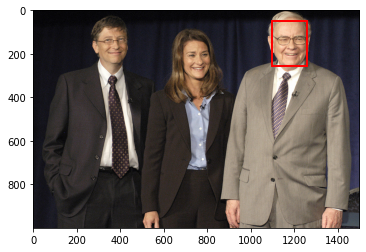

In [10]:
for i, face in enumerate(faces):
    x, y, w, h = face['box']
    try:
        res = DeepFace.verify(path+person_file, group_photo[y:y+h, x:x+w, 0:4])
        if res['verified']:
            print(f"Our person is present in the photo, woohoo!")
            print(res)

            fig, ax = plt.subplots()
            ax.imshow(group_photo)
            rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            plt.show()
            break
    except:
        pass
    else:
        print("Our person is not present in the photo :(")